In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 1. Adathalmaz előkészítése

Olvasd be a movies_prep és a ratings_sample csv fájlokat. Előbbi az egyes filmek kategóriáját tartalmazza, utóbbi pedig a filmekre vonatkozó felhasználói értékeléseket.

Normalizáld a felhasználók egyes értékeléseit az adott felhasználó átlagos értékelésével (adott felhasználó minden értékeléséből kivonod, hogy az összes általa értékelt filmen mi volt az átlagos értékelése) - megszokott értékelési tendenciájához képest jobban / kevésbé kedveli.

A filmkategóriáknál (genre_) a 0 értékeket helyettesítsd nan értékkel majd szorozd rá az adott film normalizált értékelését (rating). Ezután állítsd elő, hogy az egyes felhasználók az egyes kategóriákat átlagosan mennyire szeretik, hogy a klaszterező algoritmus számára megfelelő formába kerüljön.

In [3]:
pd.set_option('display.max_columns', None)

movies_df = pd.read_csv('movies_prep.csv')
ratings_df = pd.read_csv('ratings_sample.csv')

ratings_df.head()


,userId,movieId,rating,timestamp
0,123759,3243,3.0,1017030084
1,104903,594,2.0,1082736879
2,14310,2953,4.0,992503206
3,62120,3917,1.0,1460077438
4,9650,98809,1.0,1500832106


In [4]:
movies_df.head()


,movieId,title,genres,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy,genre_Romance,genre_Drama,genre_Action,genre_Crime,genre_Thriller,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_IMAX,genre_Documentary,genre_War,genre_Musical,genre_Western,genre_Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Average rating for each user
user_avg_rating = ratings_df.groupby('userId')['rating'].mean()

# Then merge them back into the original
ratings_df = ratings_df.merge(user_avg_rating, on='userId', suffixes=('', '_avg'))

# Normalize ratings by subtracting user's average rating
ratings_df['normalized_rating'] = ratings_df['rating'] - ratings_df['rating_avg']

ratings_df.head()


,userId,movieId,rating,timestamp,rating_avg,normalized_rating
0,123759,3243,3.0,1017030084,3.701149,-0.701149
1,104903,594,2.0,1082736879,3.521739,-1.521739
2,14310,2953,4.0,992503206,3.666667,0.333333
3,62120,3917,1.0,1460077438,2.457447,-1.457447
4,9650,98809,1.0,1500832106,3.696429,-2.696429


In [6]:
ratings_df.tail()


,userId,movieId,rating,timestamp,rating_avg,normalized_rating
2999995,114722,186,4.0,946040571,3.126984,0.873016
2999996,60260,1907,5.0,945109248,4.187500,0.812500
2999997,135481,2942,1.5,1238976761,1.666667,-0.166667
2999998,36671,2617,3.5,1541880180,3.054054,0.445946
2999999,91176,708,0.5,1538103704,3.082090,-2.582090


In [7]:
genre_columns = [col for col in movies_df.columns if col.startswith('genre_')]

genre_columns


['genre_Adventure',
 'genre_Animation',
 'genre_Children',
 'genre_Comedy',
 'genre_Fantasy',
 'genre_Romance',
 'genre_Drama',
 'genre_Action',
 'genre_Crime',
 'genre_Thriller',
 'genre_Horror',
 'genre_Mystery',
 'genre_Sci-Fi',
 'genre_IMAX',
 'genre_Documentary',
 'genre_War',
 'genre_Musical',
 'genre_Western',
 'genre_Film-Noir']

In [8]:
# Replace 0 with nan in genre columns
movies_df[genre_columns] = movies_df[genre_columns].replace(0, np.nan)

merged_df = ratings_df.merge(movies_df[['movieId'] + genre_columns], on='movieId')

merged_df.head()


,userId,movieId,rating,timestamp,rating_avg,normalized_rating,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy,genre_Romance,genre_Drama,genre_Action,genre_Crime,genre_Thriller,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_IMAX,genre_Documentary,genre_War,genre_Musical,genre_Western,genre_Film-Noir
0,123759,3243,3.0,1017030084,3.701149,-0.701149,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104903,594,2.0,1082736879,3.521739,-1.521739,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,14310,2953,4.0,992503206,3.666667,0.333333,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62120,3917,1.0,1460077438,2.457447,-1.457447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9650,98809,1.0,1500832106,3.696429,-2.696429,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Multiply normalized ratings with genre values
for genre in genre_columns:
    merged_df[genre] = merged_df[genre] * merged_df['normalized_rating']

user_genre_preferences = merged_df.groupby('userId')[genre_columns].mean()

user_genre_preferences


,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy,genre_Romance,genre_Drama,genre_Action,genre_Crime,genre_Thriller,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_IMAX,genre_Documentary,genre_War,genre_Musical,genre_Western,genre_Film-Noir
userId,,,,,,,,,,,,,,,,,,,
1,2.222222e-01,NaN,NaN,7.222222e-01,0.222222,1.222222,0.007937,NaN,-0.277778,-0.277778,NaN,NaN,NaN,NaN,NaN,-0.027778,NaN,NaN,-0.277778
2,3.942857e-01,0.680000,0.930000,-6.950000e-01,0.180000,-1.570000,0.121176,-0.257500,0.680000,0.480000,0.180000,0.430000,0.680000,0.680000,NaN,1.180000,0.680000,NaN,NaN
3,6.506239e-02,0.212121,-0.037879,-2.045455e-01,-0.037879,-0.287879,0.212121,-0.166257,0.327506,-0.047138,-0.537879,0.524621,-0.172494,-0.232323,NaN,-0.087879,NaN,NaN,1.212121
4,-3.407258e-01,0.453917,0.513441,5.342742e-01,-1.003226,0.263441,0.696774,-0.181004,0.596774,-0.153226,NaN,0.096774,-0.903226,-1.203226,NaN,0.096774,0.346774,0.096774,NaN
5,-1.333333e-01,0.266667,0.266667,-3.047619e-01,-0.400000,-0.533333,0.266667,-0.400000,NaN,-0.400000,0.266667,1.266667,0.266667,0.266667,NaN,NaN,0.266667,-0.733333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,-5.000000e-01,NaN,1.000000,0.000000e+00,0.000000,-0.200000,0.000000,-0.500000,NaN,1.000000,0.000000,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
162538,-1.153846e+00,NaN,NaN,-1.098901e-02,-0.153846,-0.403846,0.446154,0.246154,1.012821,0.096154,NaN,0.846154,-0.320513,-0.153846,NaN,0.346154,NaN,NaN,NaN
162539,2.960595e-16,0.666667,0.666667,2.960595e-16,0.666667,NaN,0.666667,-0.666667,0.666667,0.333333,NaN,0.666667,-0.333333,NaN,NaN,-0.333333,NaN,NaN,NaN


In [10]:
# Fill NaN values with 0 representing no preference
user_genre_preferences = user_genre_preferences.fillna(0)

# Normalization
scaler = MinMaxScaler()
user_genre_preferences_scaled = pd.DataFrame(scaler.fit_transform(user_genre_preferences),
                                             columns=user_genre_preferences.columns,
                                             index=user_genre_preferences.index)

user_genre_preferences_scaled


,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Fantasy,genre_Romance,genre_Drama,genre_Action,genre_Crime,genre_Thriller,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_IMAX,genre_Documentary,genre_War,genre_Musical,genre_Western,genre_Film-Noir
userId,,,,,,,,,,,,,,,,,,,
1,0.567574,0.574932,0.529412,0.652534,0.539375,0.738019,0.527194,0.536424,0.498527,0.490421,0.511945,0.530576,0.522828,0.526316,0.505576,0.531715,0.561668,0.510647,0.450810
2,0.590865,0.671281,0.650980,0.467870,0.534150,0.363884,0.543233,0.500613,0.630016,0.594943,0.534407,0.586646,0.612960,0.615789,0.505576,0.693386,0.655794,0.510647,0.486808
3,0.546299,0.604987,0.524460,0.531776,0.507188,0.535678,0.556114,0.513302,0.581623,0.522234,0.444825,0.598984,0.499964,0.495747,0.505576,0.523670,0.561668,0.510647,0.643892
4,0.491368,0.639247,0.596528,0.628044,0.387726,0.609550,0.624757,0.511251,0.618590,0.507601,0.511945,0.543194,0.403107,0.367997,0.505576,0.548387,0.609669,0.523303,0.486808
5,0.519443,0.612716,0.564270,0.518718,0.462375,0.502789,0.563839,0.480795,0.536661,0.473563,0.545222,0.695743,0.558174,0.561404,0.505576,0.535433,0.598580,0.414745,0.486808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,0.469808,0.574932,0.660131,0.558428,0.511875,0.547453,0.526070,0.466887,0.536661,0.666667,0.511945,0.660971,0.390280,0.526316,0.505576,0.535433,0.561668,0.510647,0.486808
162538,0.381298,0.574932,0.529412,0.556996,0.492837,0.520139,0.589261,0.570657,0.675707,0.541998,0.511945,0.640910,0.480344,0.506073,0.505576,0.581769,0.561668,0.510647,0.486808
162539,0.537492,0.669391,0.616558,0.558428,0.594375,0.574251,0.620493,0.443709,0.628185,0.574713,0.511945,0.617506,0.478645,0.526316,0.505576,0.490814,0.561668,0.510647,0.486808


# 2. K-Means klaszterezés

Keresd meg hány klasztert kellene létrehozni a K-Means algoritmussal a felhasználókból (random_state = 42 értékkel). Ezután végezd el a klaszterezést és vond le a következtetést, hogy melyik klaszternek melyik a 3 legjobban és 3 legkevésbé kedvelt filmkategóriája.

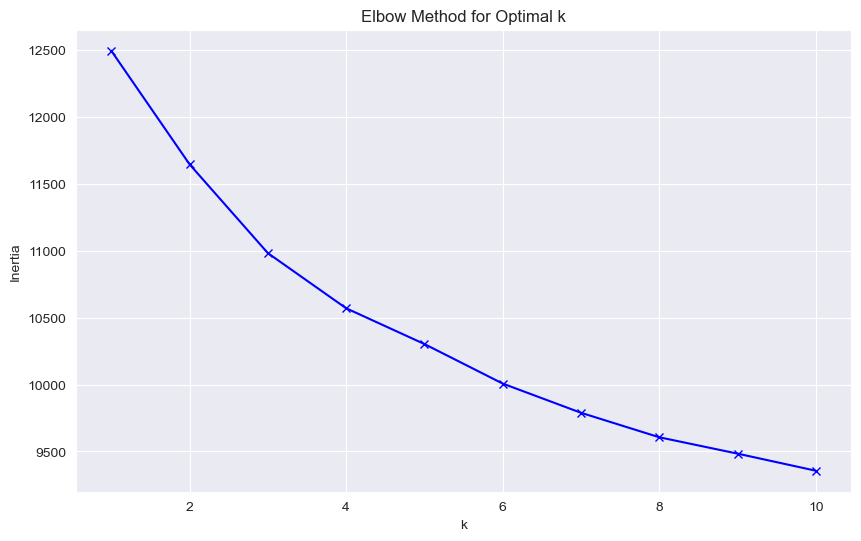

In [11]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_genre_preferences_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [12]:
optimal_k = 3

# K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(user_genre_preferences_scaled)

user_genre_preferences['Cluster'] = cluster_labels


In [14]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=user_genre_preferences.columns[:-1])


In [17]:
# The 3 most and least liked categories for each cluster
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    centroid = centroids_df.iloc[cluster]
    top_3 = centroid.nlargest(3)
    bottom_3 = centroid.nsmallest(3)

    print("Top 3 liked categories:")
    for category, score in top_3.items():
        print(f"{category}: {score:.4f}")

    print("\nLeast 3 liked categories:")
    for category, score in bottom_3.items():
        print(f"{category}: {score:.4f}")



Cluster 0:
Top 3 liked categories:
genre_Romance: 0.6086
genre_Animation: 0.6014
genre_Musical: 0.5823

Least 3 liked categories:
genre_Sci-Fi: 0.4620
genre_Action: 0.4714
genre_Thriller: 0.4817

Cluster 1:
Top 3 liked categories:
genre_Crime: 0.5862
genre_Romance: 0.5661
genre_Thriller: 0.5658

Least 3 liked categories:
genre_Children: 0.4274
genre_Fantasy: 0.4512
genre_Adventure: 0.4865

Cluster 2:
Top 3 liked categories:
genre_Animation: 0.5861
genre_Musical: 0.5640
genre_Romance: 0.5607

Least 3 liked categories:
genre_Film-Noir: 0.4894
genre_Documentary: 0.5062
genre_Horror: 0.5088


Ahogy fent látható a 0. klaszternek például a romantikus, animáció, és musical-ek a kedvencei, míg nem szeretik a sci-fit-t, akciót, és thrillereket. 
Mind három fenti eredmény triviális, és megnyugtató abból a szempontból, hogy jól végeztük a klaszterezést. Alább még egy diagram látható az egyes klaszterekben lakó populációkról.

Kimenet:

Cluster 0:

Top 3 liked categories:

genre_Romance: 0.6086

genre_Animation: 0.6014

genre_Musical: 0.5823

Least 3 liked categories:

genre_Sci-Fi: 0.4620

genre_Action: 0.4714

genre_Thriller: 0.4817

Cluster 1:

Top 3 liked categories:

genre_Crime: 0.5862

genre_Romance: 0.5661

genre_Thriller: 0.5658

Least 3 liked categories:

genre_Children: 0.4274

genre_Fantasy: 0.4512

genre_Adventure: 0.4865

Cluster 2:

Top 3 liked categories:

genre_Animation: 0.5861

genre_Musical: 0.5640

genre_Romance: 0.5607

Least 3 liked categories:

genre_Film-Noir: 0.4894

genre_Documentary: 0.5062

genre_Horror: 0.5088

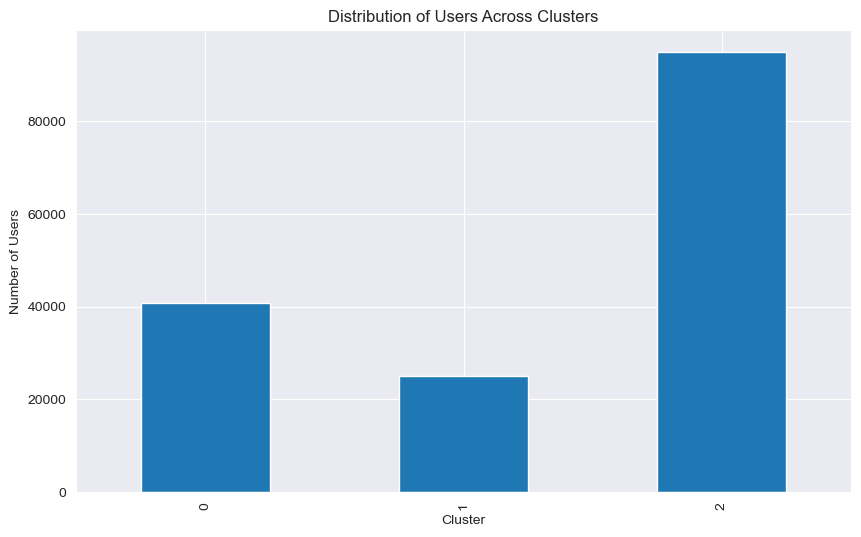

In [16]:
plt.figure(figsize=(10, 6))
user_genre_preferences['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()


# 3. Hierarchikus klaszterezés

Határozd meg, hogy a felhasználói értékelések szerint melyik filmkategória melyikhez hasonló és a kategóriák hány csoportba kerülnek besorolásra (linkage = 'complete'). A Documentary kategória kedvelőinek ezalapján milyen további filmkategóriát javasolnál, ami várhatóan tetszene nekik? Javasolj egy általad választott tetszőleges felhasználó számára az előző vagy a mostani feladat klaszterezése alapján egy olyan filmet, amilyen kategóriából még nem látott és valószínűleg tetszene neki.

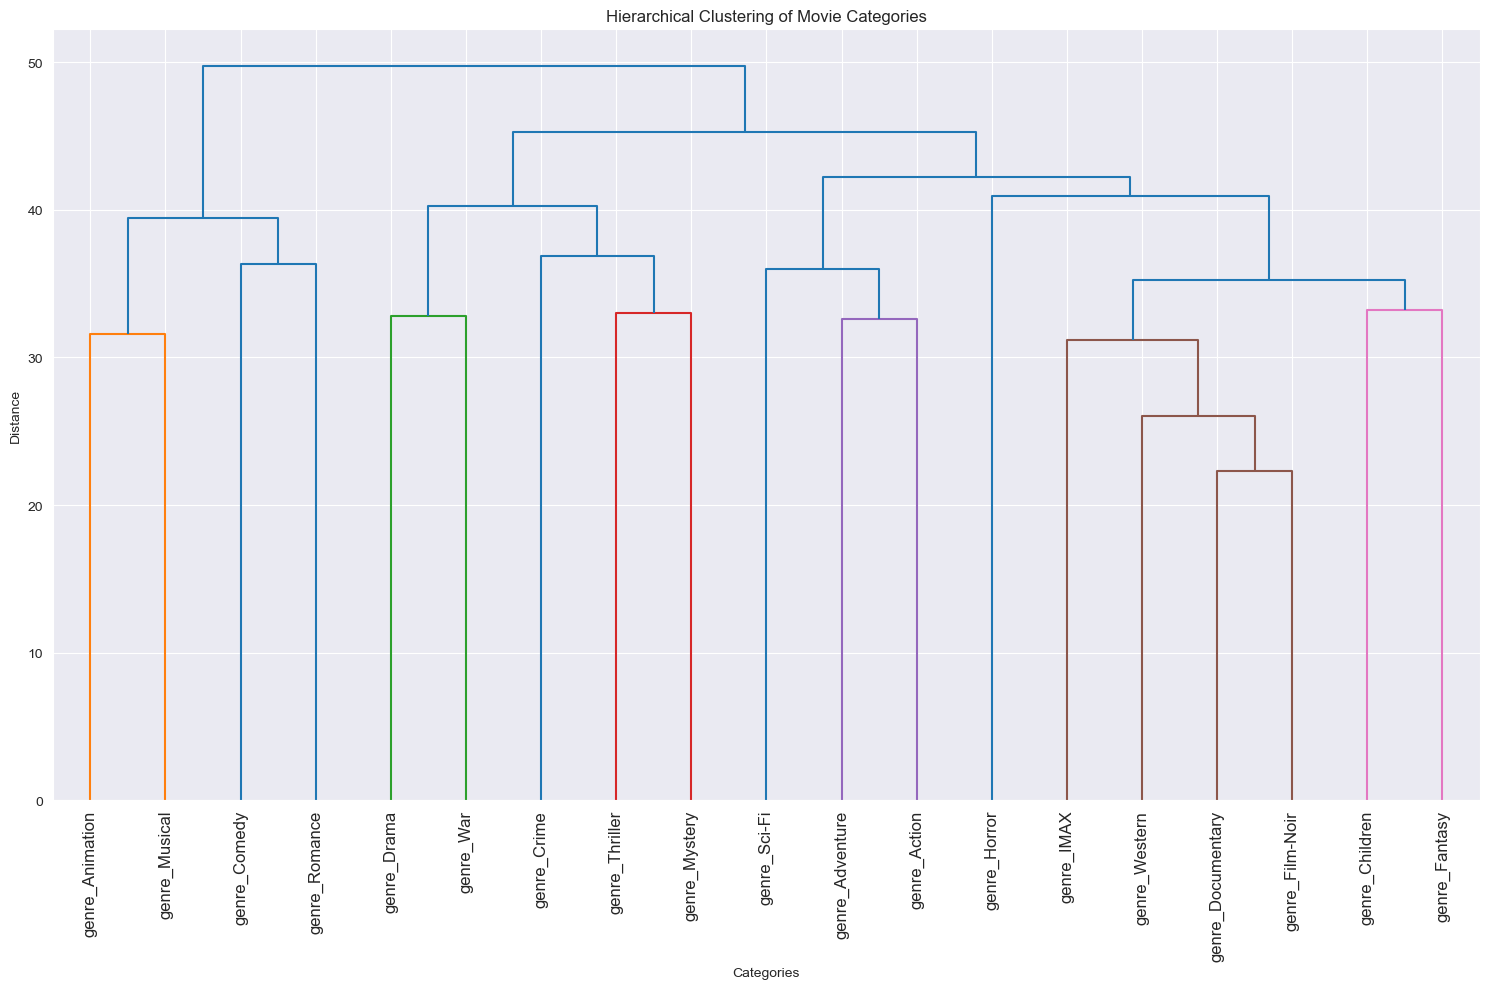

In [22]:
# Categories need to be rows
categories_df = user_genre_preferences_scaled.transpose()

# Hierarchical clustering & dendrogram
linkage_matrix = linkage(categories_df, method='complete')

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=categories_df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering of Movie Categories')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


A fenti ábráról már láthatjuk, hogy a Film-Noir áll a legközelebb a Documentary kategóriához, de még a Western és az IMAX is csak nem akkora mértékben. (Bár én személyesen nem gondolom az IMAX-et egy külön kategóriának)

In [31]:
# Determine the number of clusters
max_d = 0.5 * np.max(linkage_matrix[:, 2])
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# DataFrame with categories and their cluster assignments
category_clusters = pd.DataFrame({'Category': categories_df.index, 'Cluster': clusters})
print(category_clusters)


             Category  Cluster
0     genre_Adventure       10
1     genre_Animation        1
2      genre_Children       16
3        genre_Comedy        3
4       genre_Fantasy       17
5       genre_Romance        4
6         genre_Drama        5
7        genre_Action       11
8         genre_Crime        9
9      genre_Thriller        7
10       genre_Horror       18
11      genre_Mystery        8
12       genre_Sci-Fi       12
13         genre_IMAX       15
14  genre_Documentary       13
15          genre_War        6
16      genre_Musical        2
17      genre_Western       14
18    genre_Film-Noir       13


In [33]:
documentary_cluster = category_clusters[category_clusters['Category'] == 'genre_Documentary']['Cluster'].values[0]
similar_categories = category_clusters[category_clusters['Cluster'] == documentary_cluster]['Category'].tolist()
similar_categories.remove('genre_Documentary')

print(f"Categories similar to Documentary: {similar_categories}")


Categories similar to Documentary: ['genre_Film-Noir']


Tehát erre a kérdésre: "A Documentary kategória kedvelőinek ezalapján milyen további filmkategóriát javasolnál, ami várhatóan tetszene nekik?"
A Film-Noir a válasz

Ami szerencsére egyezik a dendrogramon látottakkal.


In [43]:
user_id = np.random.choice(user_genre_preferences_scaled.index)
user_preferences = user_genre_preferences_scaled.loc[user_id]

most_liked_category = user_preferences.idxmax()
most_liked_cluster = category_clusters[category_clusters['Category'] == most_liked_category]['Cluster'].values[0]

# Find other categories in the same cluster that the user hasn't rated highly
potential_recommendations = category_clusters[
    (category_clusters['Cluster'] == most_liked_cluster) &
    (category_clusters['Category'] != most_liked_category)
    ]['Category'].tolist()

# Filter out categories that the user has already rated highly
threshold = user_preferences.mean() + user_preferences.std()
unseen_categories = [cat for cat in potential_recommendations if user_preferences[cat] < threshold]

if unseen_categories:
    recommendation = np.random.choice(unseen_categories)
    print(f"\nFor user {user_id}:")
    print(f"Most liked category: {most_liked_category}")
    print(f"Recommended category: {recommendation}")



For user 3391:
Most liked category: genre_Documentary
Recommended category: genre_Film-Noir


In [55]:
user_id = 3391

# Get the movies rated by user
user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

# Other categories in the same cluster
similar_categories = category_clusters[category_clusters['Cluster'] == most_liked_cluster]['Category'].tolist()
similar_categories.remove(most_liked_category)

def movie_in_category(movie_row, category):
    genre = category.replace('genre_', '')
    return genre in movie_row['genres'].split('|')

# Movies from similar categories that the user hasn't rated
potential_movies = movies_df[
    (~movies_df['movieId'].isin(user_rated_movies)) &
    (movies_df.apply(lambda row: any(movie_in_category(row, cat) for cat in similar_categories), axis=1))
    ]

if not potential_movies.empty:
    recommended_movie = potential_movies.sample(1).iloc[0]
    print(f"\nFor user {user_id}:")
    print(f"Most liked category: {most_liked_category}")
    print(f"Recommended movie: {recommended_movie['title']} (ID: {recommended_movie['movieId']})")
    print(f"Movie genres: {recommended_movie['genres']}")
    print("\nThis movie is recommended because it belongs to the following similar categories:")
    for category in similar_categories:
         if movie_in_category(recommended_movie, category):
             print(f"- {category}")



For user 3391:
Most liked category: genre_Documentary
Recommended movie: Dark Passage (1947) (ID: 7217)
Movie genres: Crime|Drama|Film-Noir|Romance|Thriller

This movie is recommended because it belongs to the following similar categories:
- genre_Film-Noir


A 3391-es ID user-t véletlen találtam, és őt választottam mert pont a documentary kategóriát szereti. Filmajánlás ennek a usernek:

For user 3391:

Most liked category: genre_Documentary

Recommended movie: Dark Passage (1947) (ID: 7217)

Movie genres: Crime|Drama|Film-Noir|Romance|Thriller

This movie is recommended because it belongs to the following similar categories:
- genre_Film-Noir